In [2]:
import pymaid
import navis as nv
import matplotlib.pyplot as plt
#from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.axes as axx
import matplotlib.font_manager as fm
fontprops = fm.FontProperties(size=18)
import time
from navis.interfaces import neuprint as nvneu
from neuroboom import dendrogram as nbd
import neuroboom as nb
import seaborn as sns


In [3]:
#connect your catmaid instance
instance=pymaid.CatmaidInstance('https://radagast.hms.harvard.edu/catmaidaedes',"")


INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [4]:
#merge dictionary function
def Merge(dict_1, dict_2):
	result = dict_1 | dict_2
	return result

Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/45 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/45 [00:00<?, ?it/s]

CN details:   0%|          | 0/497 [00:00<?, ?it/s]

INFO  : Data for 497 of 497 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 5s
neuron 7173


<Figure size 640x480 with 0 Axes>

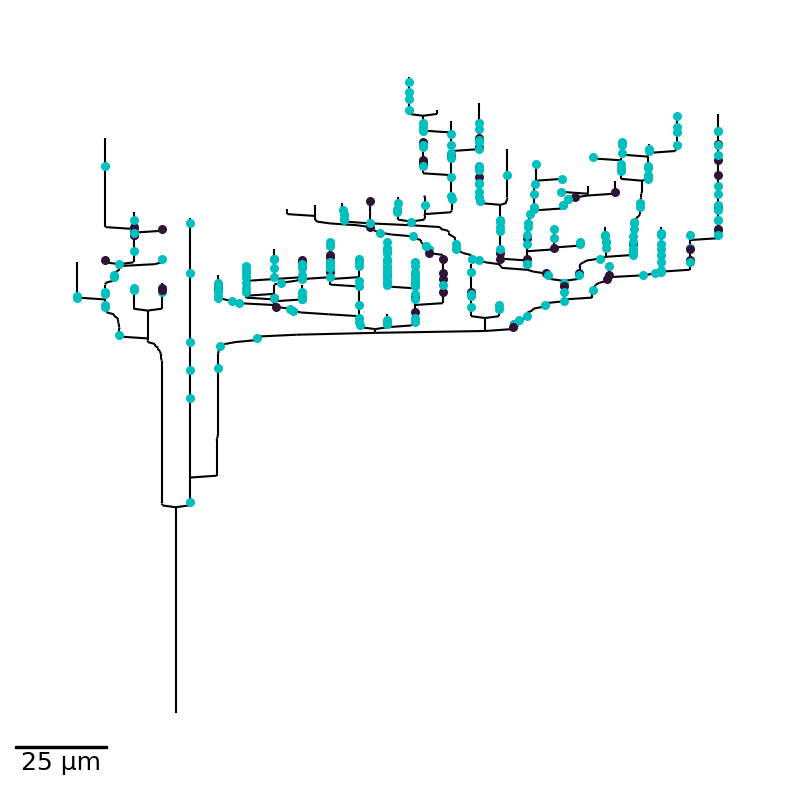

CN details:   0%|          | 0/341 [00:00<?, ?it/s]

INFO  : Data for 341 of 341 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 4s
neuron 7816


<Figure size 640x480 with 0 Axes>

KeyboardInterrupt: 

In [5]:
#get ya sensory neurons
glomerulus="md1"
subset_ids = pymaid.get_skids_by_annotation(['left palp nerve', 'sensory neuron', "innervates MD1", "PSPs done"], allow_partial = False, intersect = True)
subset = pymaid.get_neuron(subset_ids)
all_ids = pymaid.get_skids_by_annotation(['left palp nerve', 'sensory neuron', "innervates MD1"], allow_partial = False, intersect = True)
all=pymaid.get_neuron(all_ids)

for n in subset:

    #get uPN and recurrent connector IDs
    con_details = pymaid.get_connector_details(n)
    con_details_explode=con_details.explode("postsynaptic_to")
    con_details_uPN=con_details_explode[con_details_explode["postsynaptic_to"]==295]
    con_details_recurrent=con_details_explode[con_details_explode["postsynaptic_to"].isin(all_ids)] 

    #color dictionary for uPN and recurrent connections
    uPN_color = list(sns.color_palette('twilight',1))
    recurrent_color=["c"]*46
    uPN_id_to_color = dict(zip([295], uPN_color))
    recurrent_id_to_color= dict(zip(all_ids, recurrent_color))
    
    #map uPN connectors to the neuron
    uPN_connector_id_to_neuron = dict(zip(con_details_uPN.connector_id, con_details_uPN.postsynaptic_to))
    uPN_connector_id_to_color = {i : uPN_id_to_color[uPN_connector_id_to_neuron[i]] for i in con_details_uPN.connector_id}

    #map recurrent connectors to the neuron
    recurrent_connector_id_to_neuron = dict(zip(con_details_recurrent.connector_id, con_details_recurrent.postsynaptic_to))
    recurrent_connector_id_to_color = {i : recurrent_id_to_color[recurrent_connector_id_to_neuron[i]] for i in con_details_recurrent.connector_id}
    connector_id_to_color= Merge(uPN_connector_id_to_color, recurrent_connector_id_to_color)

    #plot the dendrogram
    plt.clf()
    fig, ax= plt.subplots(figsize = (10,10))
    nbd.plot_dendrogram(n, fragment='true', prog='dot', linewidth=1.5, highlight_connectors = connector_id_to_color, highlight_connector_size=30)

    #scalebar
    scalebar = AnchoredSizeBar(ax.transData, 300, '25 µm', 'lower left', pad=0.1, color='black', frameon=False, size_vertical=100, fontproperties=fontprops)
    ax.add_artist(scalebar)
   
    print(n.name)
    name=str(n.id)
    #plt.savefig('/home/jb534/pymaid_scripts/aedes/svg/axograms/axogram_%s_feedforward_recurrent_%s.svg' % (glomerulus, name), transparent=true, format="svg")
    #plt.savefig('/home/jb534/pymaid_scripts/aedes/svg/axograms/axogram_%s_feedforward_recurrent_%s.png' % (glomerulus, name), transparent=true, format="png")
    plt.show()

In [ ]:
#specify glomerulus
glomerulus="md2"
uPNid=690

#get ya sensory neurons
subset_ids = pymaid.get_skids_by_annotation(['left palp nerve', 'sensory neuron', "innervates MD2", "PSPs done"], allow_partial = False, intersect = True)
subset = pymaid.get_neuron(subset_ids)
all_ids = pymaid.get_skids_by_annotation(['left palp nerve', 'sensory neuron', "innervates MD2"], allow_partial = False, intersect = True)
all=pymaid.get_neuron(all_ids)

for n in subset:

    #get uPN and recurrent connector IDs
    con_details = pymaid.get_connector_details(n)
    con_details_explode=con_details.explode("postsynaptic_to")
    con_details_uPN=con_details_explode[con_details_explode["postsynaptic_to"]==uPNid]
    con_details_recurrent=con_details_explode[con_details_explode["postsynaptic_to"].isin(all_ids)] 

    #color dictionary for uPN and recurrent connections
    uPN_color = list(sns.color_palette('twilight',1))
    recurrent_color=["c"]*46
    uPN_id_to_color = dict(zip([uPNid], uPN_color))
    recurrent_id_to_color= dict(zip(all_ids, recurrent_color))
    
    #map uPN connectors to the neuron
    uPN_connector_id_to_neuron = dict(zip(con_details_uPN.connector_id, con_details_uPN.postsynaptic_to))
    uPN_connector_id_to_color = {i : uPN_id_to_color[uPN_connector_id_to_neuron[i]] for i in con_details_uPN.connector_id}

    #map recurrent connectors to the neuron
    recurrent_connector_id_to_neuron = dict(zip(con_details_recurrent.connector_id, con_details_recurrent.postsynaptic_to))
    recurrent_connector_id_to_color = {i : recurrent_id_to_color[recurrent_connector_id_to_neuron[i]] for i in con_details_recurrent.connector_id}


    connector_id_to_color= Merge(uPN_connector_id_to_color, recurrent_connector_id_to_color)

    #plot the dendrogram
    plt.clf()
    fig, ax= plt.subplots(figsize = (10,10))
    nbd.plot_dendrogram(n, fragment='true', prog='dot', linewidth=1.5, highlight_connectors = connector_id_to_color, highlight_connector_size=30)

    #scalebar
    scalebar = AnchoredSizeBar(ax.transData, 300, '25 µm', 'lower left', pad=0.1, color='black', frameon=False, size_vertical=100, fontproperties=fontprops)
    ax.add_artist(scalebar)
   
    print(n.name)
    name=str(n.id)
    #plt.savefig('/home/jb534/pymaid_scripts/aedes/svg/axograms/axogram_%s_feedforward_recurrent_%s.svg' % (glomerulus, name), transparent=true, format="svg")
    #plt.savefig('/home/jb534/pymaid_scripts/aedes/svg/axograms/axogram_%s_feedforward_recurrent_%s.png' % (glomerulus, name), transparent=true, format="png")
    plt.show()

NameError: name 'pymaid' is not defined

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/46 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/46 [00:00<?, ?it/s]

CN details:   0%|          | 0/133 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Data for 133 of 133 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 1s
neuron 8962


<Figure size 640x480 with 0 Axes>

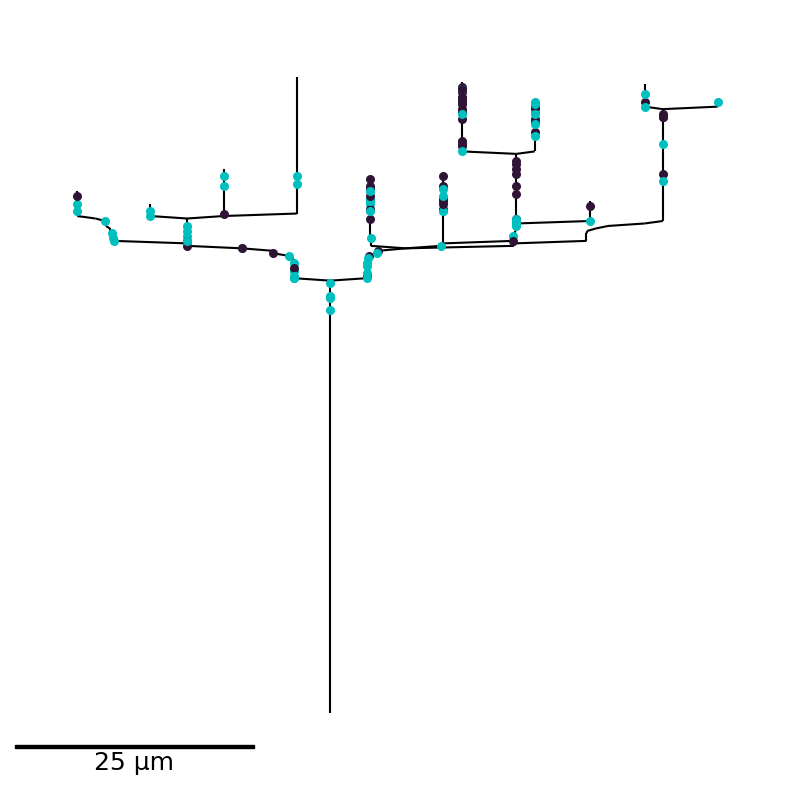

CN details:   0%|          | 0/198 [00:00<?, ?it/s]

INFO  : Data for 198 of 198 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 1s
neuron 7076


<Figure size 640x480 with 0 Axes>

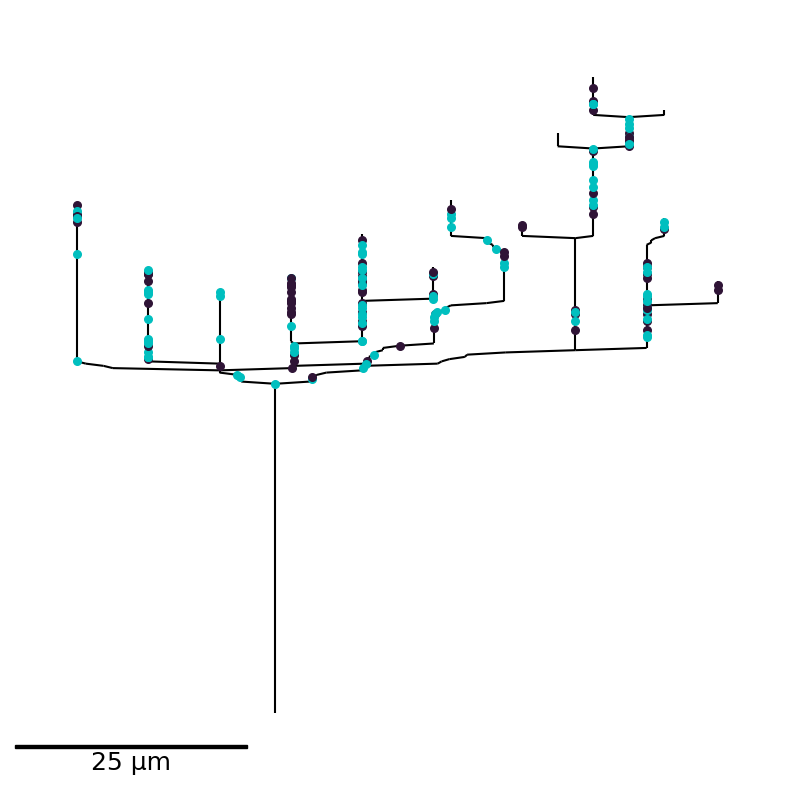

CN details:   0%|          | 0/162 [00:00<?, ?it/s]

INFO  : Data for 162 of 162 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 1s
neuron 7271


<Figure size 640x480 with 0 Axes>

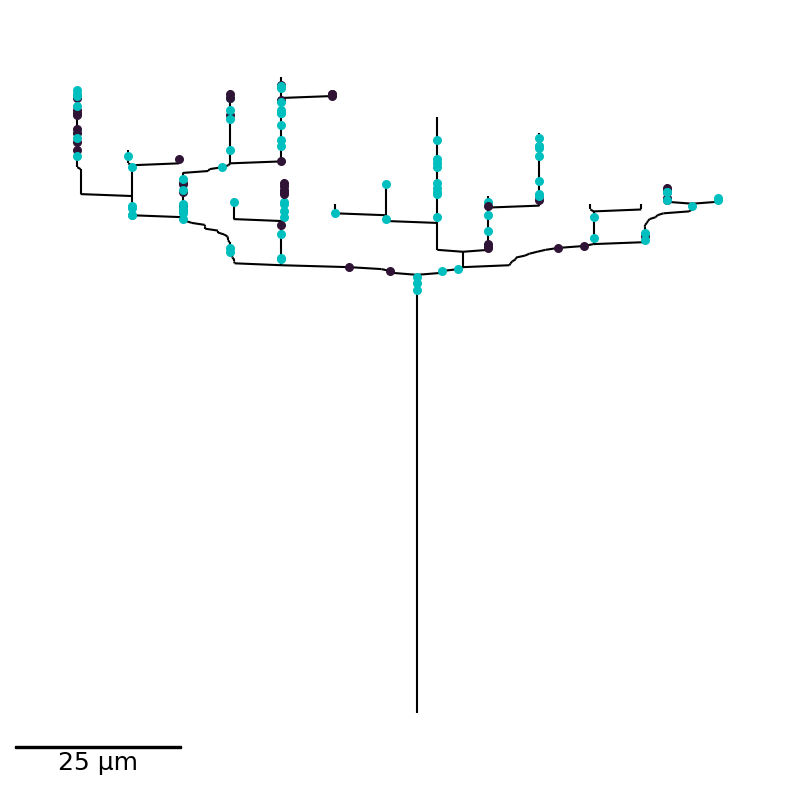

CN details:   0%|          | 0/178 [00:00<?, ?it/s]

INFO  : Data for 178 of 178 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 1s
neuron 7788


<Figure size 640x480 with 0 Axes>

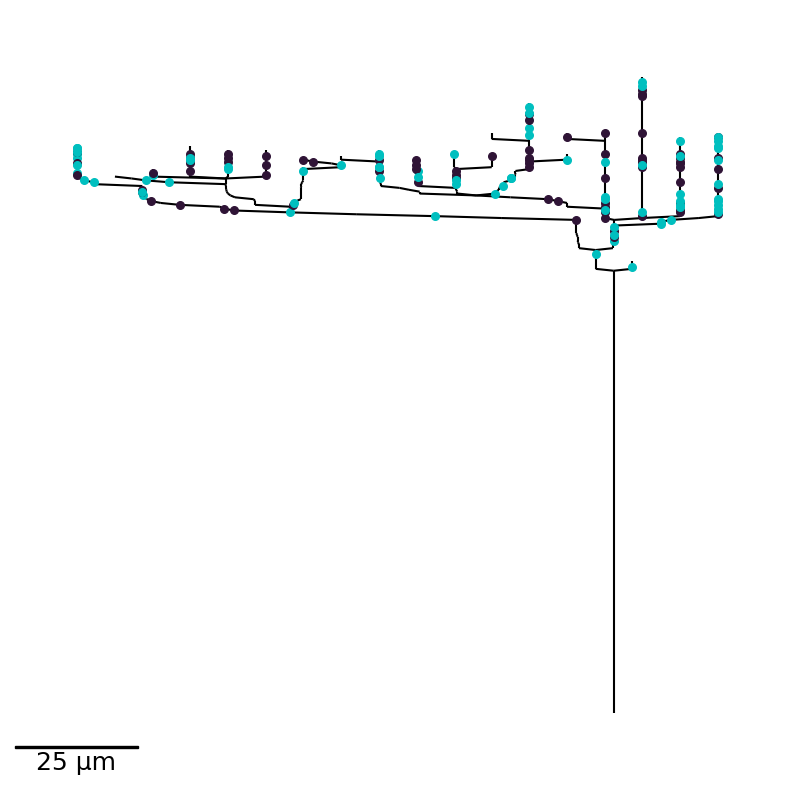

CN details:   0%|          | 0/180 [00:00<?, ?it/s]

INFO  : Data for 180 of 180 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 1s
neuron 1102


<Figure size 640x480 with 0 Axes>

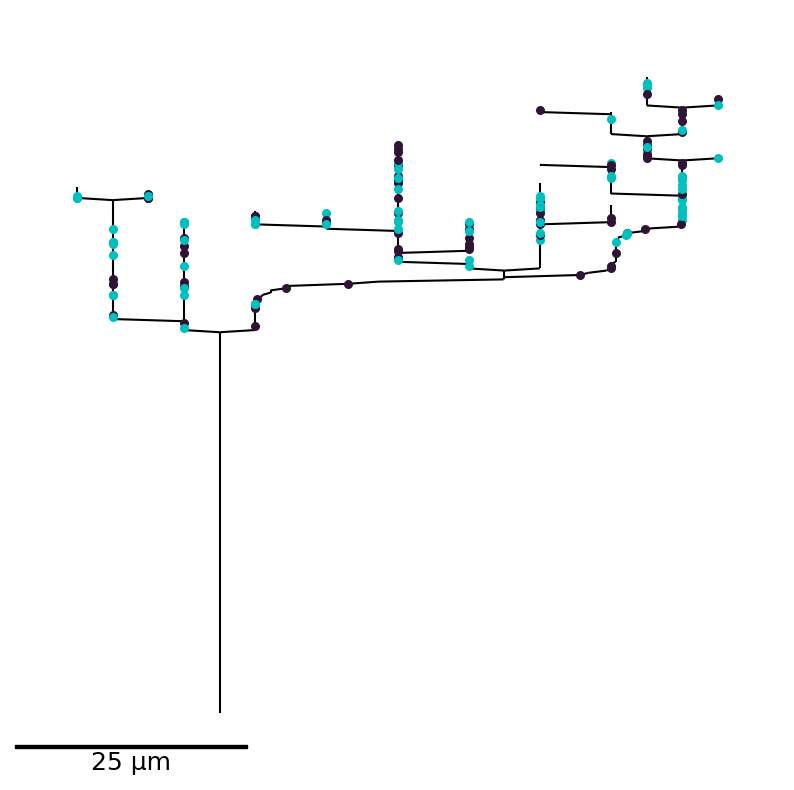

CN details:   0%|          | 0/166 [00:00<?, ?it/s]

INFO  : Data for 166 of 166 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 1s
neuron 8400


<Figure size 640x480 with 0 Axes>

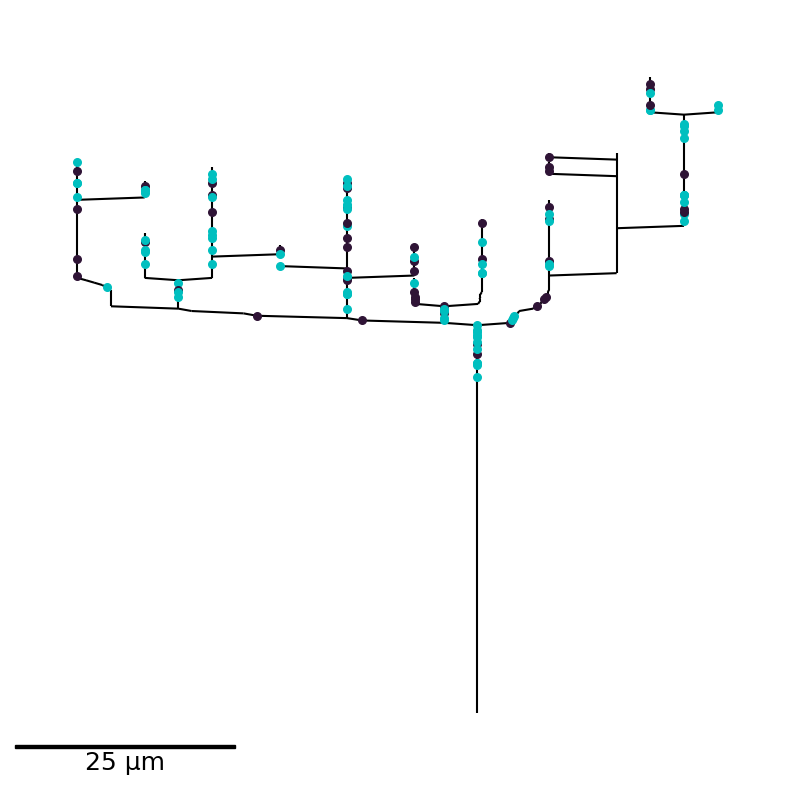

CN details:   0%|          | 0/167 [00:00<?, ?it/s]

INFO  : Data for 167 of 167 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 1s
neuron 7090


<Figure size 640x480 with 0 Axes>

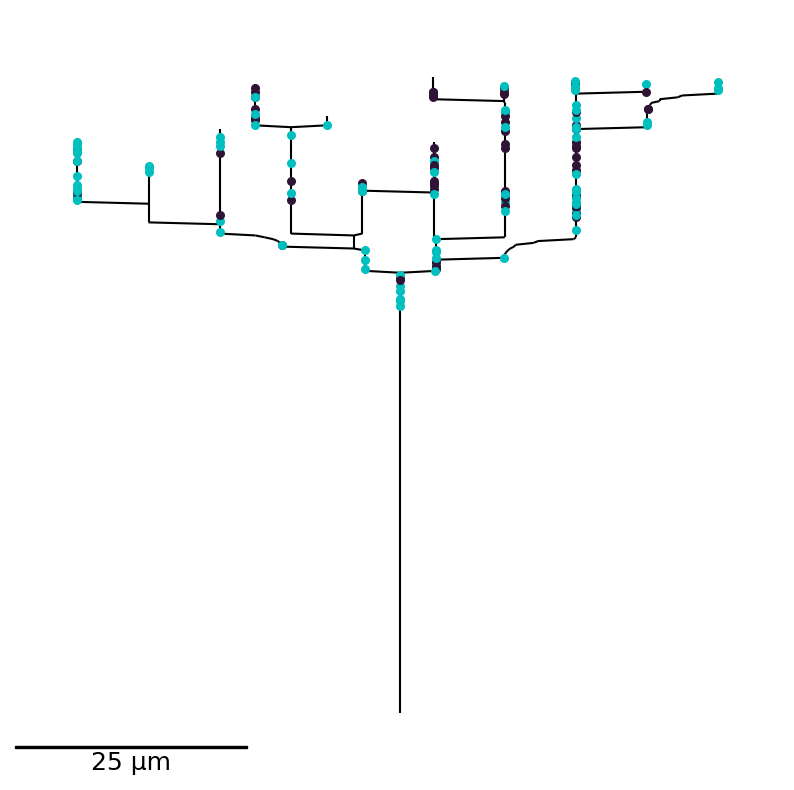

CN details:   0%|          | 0/196 [00:00<?, ?it/s]

INFO  : Data for 196 of 196 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 1s
neuron 7770


<Figure size 640x480 with 0 Axes>

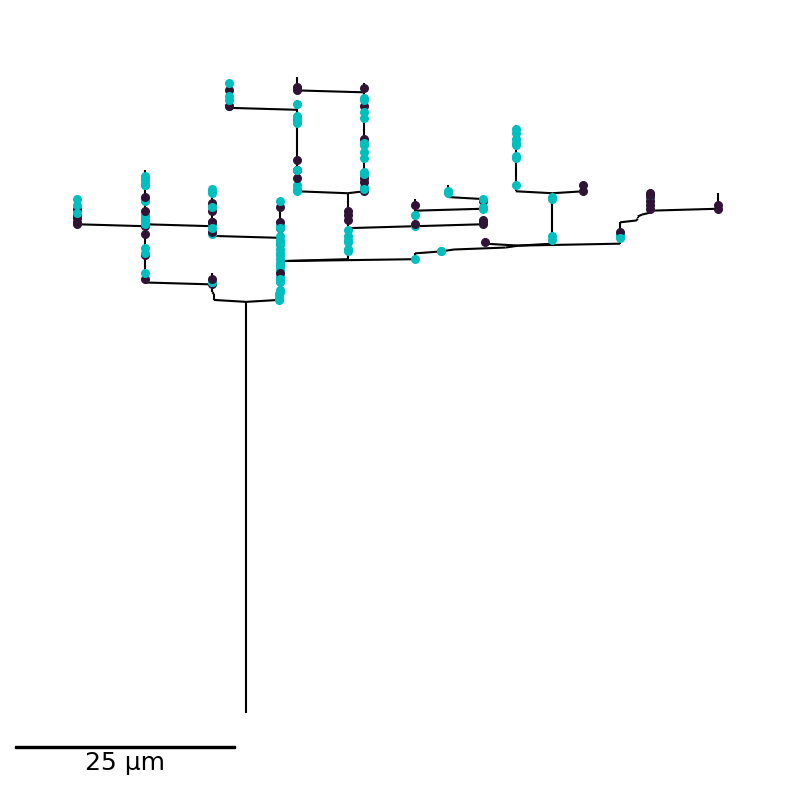

CN details:   0%|          | 0/163 [00:00<?, ?it/s]

INFO  : Data for 163 of 163 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 1s
neuron 7231


<Figure size 640x480 with 0 Axes>

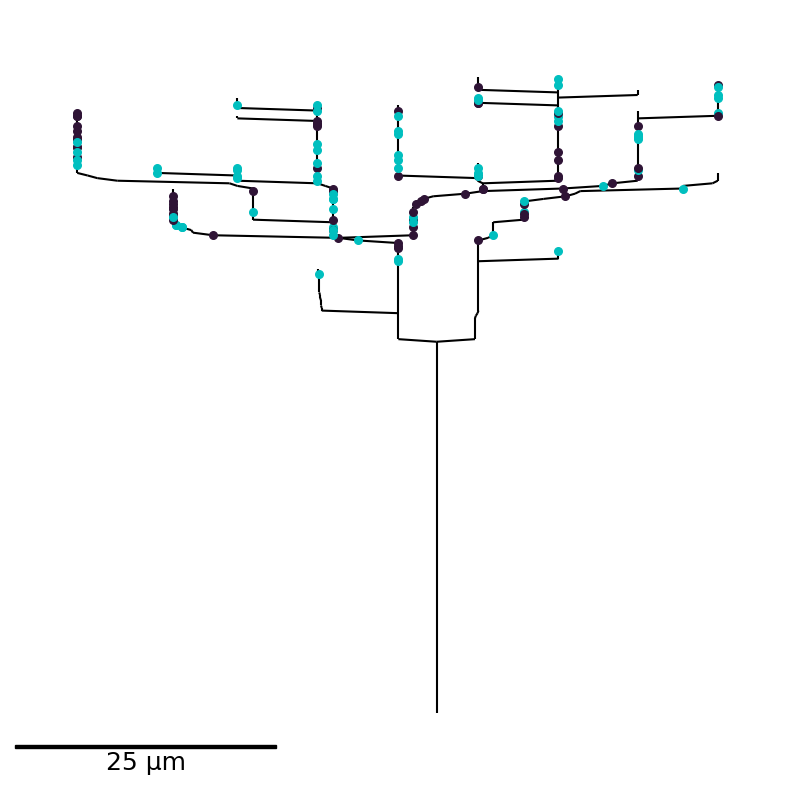

CN details:   0%|          | 0/170 [00:00<?, ?it/s]

INFO  : Data for 170 of 170 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 1s
neuron 7776


<Figure size 640x480 with 0 Axes>

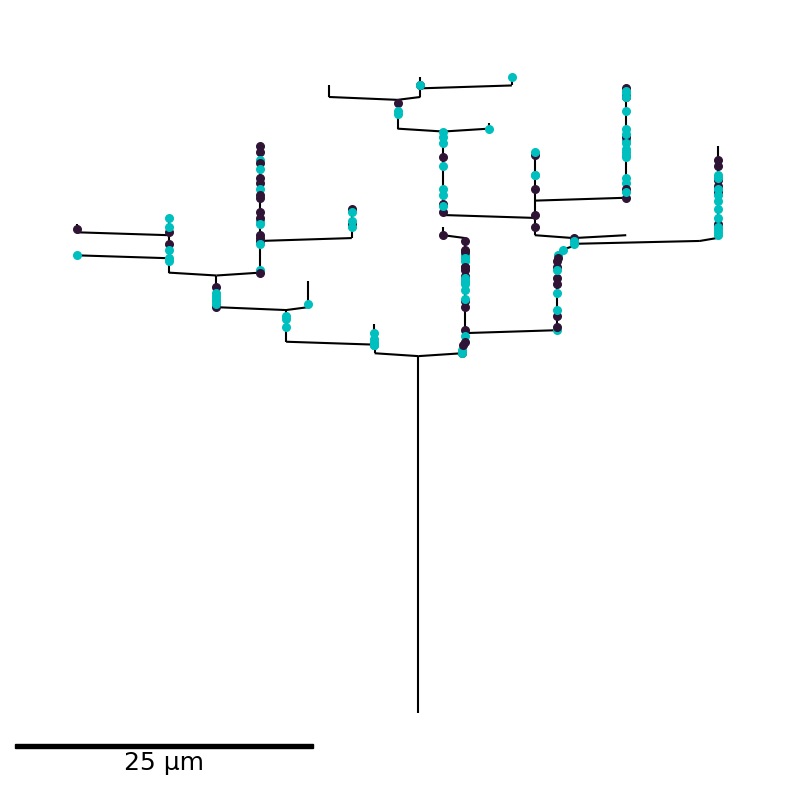

In [ ]:
#specify glomerulus
glomerulus="md3"
uPNid=11126

#get ya sensory neurons
subset_ids = pymaid.get_skids_by_annotation(['left palp nerve', 'sensory neuron', "innervates MD3", "PSPs done"], allow_partial = False, intersect = True)
subset = pymaid.get_neuron(subset_ids)
all_ids = pymaid.get_skids_by_annotation(['left palp nerve', 'sensory neuron', "innervates MD3"], allow_partial = False, intersect = True)
all=pymaid.get_neuron(all_ids)

for n in subset:

    #get uPN and recurrent connector IDs
    con_details = pymaid.get_connector_details(n)
    con_details_explode=con_details.explode("postsynaptic_to")
    con_details_uPN=con_details_explode[con_details_explode["postsynaptic_to"]==uPNid]
    con_details_recurrent=con_details_explode[con_details_explode["postsynaptic_to"].isin(all_ids)] 

    #color dictionary for uPN and recurrent connections
    uPN_color = list(sns.color_palette('twilight',1))
    recurrent_color=["c"]*46
    uPN_id_to_color = dict(zip([uPNid], uPN_color))
    recurrent_id_to_color= dict(zip(all_ids, recurrent_color))
    
    #map uPN connectors to the neuron
    uPN_connector_id_to_neuron = dict(zip(con_details_uPN.connector_id, con_details_uPN.postsynaptic_to))
    uPN_connector_id_to_color = {i : uPN_id_to_color[uPN_connector_id_to_neuron[i]] for i in con_details_uPN.connector_id}

    #map recurrent connectors to the neuron
    recurrent_connector_id_to_neuron = dict(zip(con_details_recurrent.connector_id, con_details_recurrent.postsynaptic_to))
    recurrent_connector_id_to_color = {i : recurrent_id_to_color[recurrent_connector_id_to_neuron[i]] for i in con_details_recurrent.connector_id}


    connector_id_to_color= Merge(uPN_connector_id_to_color, recurrent_connector_id_to_color)

    #plot the dendrogram
    plt.clf()
    fig, ax= plt.subplots(figsize = (10,10))
    nbd.plot_dendrogram(n, fragment='true', prog='dot', linewidth=1.5, highlight_connectors = connector_id_to_color, highlight_connector_size=30)

    #scalebar
    scalebar = AnchoredSizeBar(ax.transData, 300, '25 µm', 'lower left', pad=0.1, color='black', frameon=False, size_vertical=100, fontproperties=fontprops)
    ax.add_artist(scalebar)
   
    print(n.name)
    name=str(n.id)
    plt.savefig('/home/jb534/pymaid_scripts/aedes/svg/axograms/axogram_%s_feedforward_recurrent_%s.svg' % (glomerulus, name), format="svg")
    plt.savefig('/home/jb534/pymaid_scripts/aedes/svg/axograms/axogram_%s_feedforward_recurrent_%s.png' % (glomerulus, name), format="png")
    plt.show()